In [6]:
from google.colab import files
uploaded = files.upload()


Saving Base_espe.xlsx to Base_espe.xlsx


**Análisis de Variables Macroeconómicas para modelar el comportamiento del mercado de Tarjetas de Crédito en la Banca Múltiple
entre 2018 y 2024 con efectos inflacionarios post pandemia**

In [8]:
import pandas as pd

# Lee el archivo (cambia 'nombre_del_archivo.xlsx' por el nombre correcto)
Base_ALYA = pd.read_excel('Base_espe.xlsx')

# Muestra las primeras filas del dataframe
Base_ALYA.head()

,Periodo,TDC/CreditAlConsumo,TotalCreditoConsumoCrecimAnual,VencidaCreditoConsumoCrecimAnual,TotalTDCCrecimAnual,VencidaTDCCrecimAnual,LPI_Urbano,INPC,inflacion_sub,TDC_a_Total,Monto_TDD_y_TDC,monto_tdd,monto_tdc,cetes28
0,2017-01,0.395058,0.119811,0.142017,0.087165,0.081231,3073.55,4.72,3.84,0.430752,150921882608,85911952968,65009929640,5.83
1,2017-02,0.393547,0.119902,0.146992,0.088651,0.108865,3083.67,4.86,4.26,0.445065,132442820938,73497206993,58945613945,6.06
2,2017-03,0.389905,0.115832,0.157086,0.083827,0.134009,3100.08,5.35,4.48,0.456812,149942636334,81447103515,68495532819,6.32
3,2017-04,0.390966,0.114447,0.134386,0.092535,0.073897,3098.49,5.82,4.72,0.436871,148811255612,83799950965,65011304647,6.50
4,2017-05,0.391008,0.109601,0.149630,0.093612,0.115578,3088.13,6.16,4.78,0.447291,157549900628,87079245886,70470654742,6.56


In [9]:
Base_ALYA.describe()


,TDC/CreditAlConsumo,TotalCreditoConsumoCrecimAnual,VencidaCreditoConsumoCrecimAnual,TotalTDCCrecimAnual,VencidaTDCCrecimAnual,LPI_Urbano,INPC,inflacion_sub,TDC_a_Total,Monto_TDD_y_TDC,monto_tdd,monto_tdc,cetes28
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,8.900000e+01,8.900000e+01,8.900000e+01,89.000000
mean,0.383329,0.075476,0.050543,0.072342,0.051635,3713.026292,5.261910,4.967978,0.406761,2.644363e+11,1.573466e+11,1.070897e+11,7.447753
std,0.008842,0.080305,0.174857,0.095992,0.276454,440.535651,1.587718,1.530554,0.026900,9.785849e+10,5.928949e+10,3.951199e+10,2.241461
min,0.366680,-0.091182,-0.428147,-0.113688,-0.657863,3073.550000,2.150000,3.500000,0.345040,1.324428e+11,7.349721e+10,5.343060e+10,4.020000
25%,0.375872,0.046361,-0.020894,0.019900,-0.063928,3400.010000,4.090000,3.750000,0.386346,1.859703e+11,1.106605e+11,7.859867e+10,5.870000
50%,0.385329,0.076265,0.062100,0.067909,0.034461,3577.270000,4.860000,4.480000,0.409894,2.374809e+11,1.375132e+11,8.931533e+10,7.390000
75%,0.390156,0.130419,0.159436,0.131663,0.171274,4104.400000,6.350000,5.670000,0.423603,3.266765e+11,1.929690e+11,1.316764e+11,8.250000
max,0.401563,0.194811,0.358969,0.235355,0.640448,4528.690000,8.700000,8.510000,0.469903,5.255610e+11,3.321189e+11,2.072844e+11,11.340000


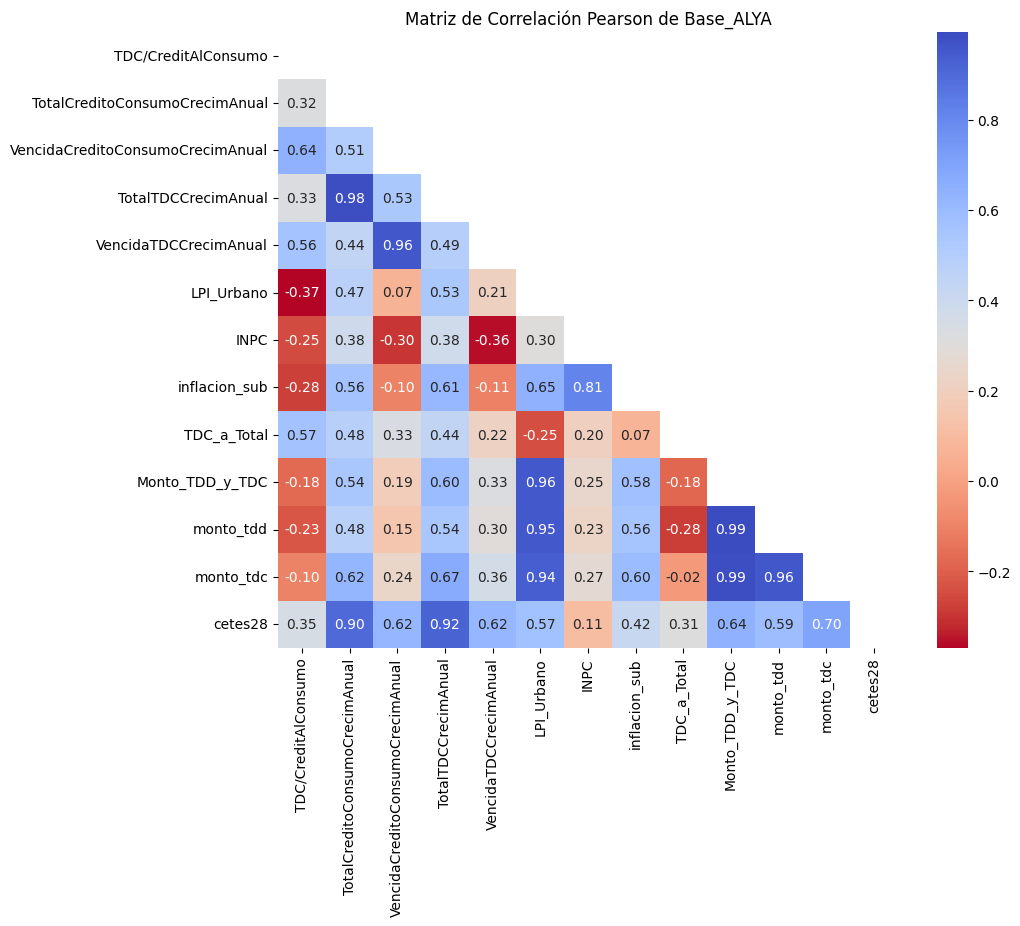

In [13]:
# Calcular y mostrar una matriz de correlaciones para evaluar variables

matriz_correlacion = Base_ALYA.iloc[:, 1:].corr()

# Muestra la matriz de correlaciones
#print(matriz_correlacion)
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Crear un heatmap para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, mask=mask, annot=True, cmap='coolwarm_r', fmt=".2f")
plt.title('Matriz de Correlación Pearson de Base_ALYA')
plt.show()


Ahora comparar con la matriz de correlacion de spearman

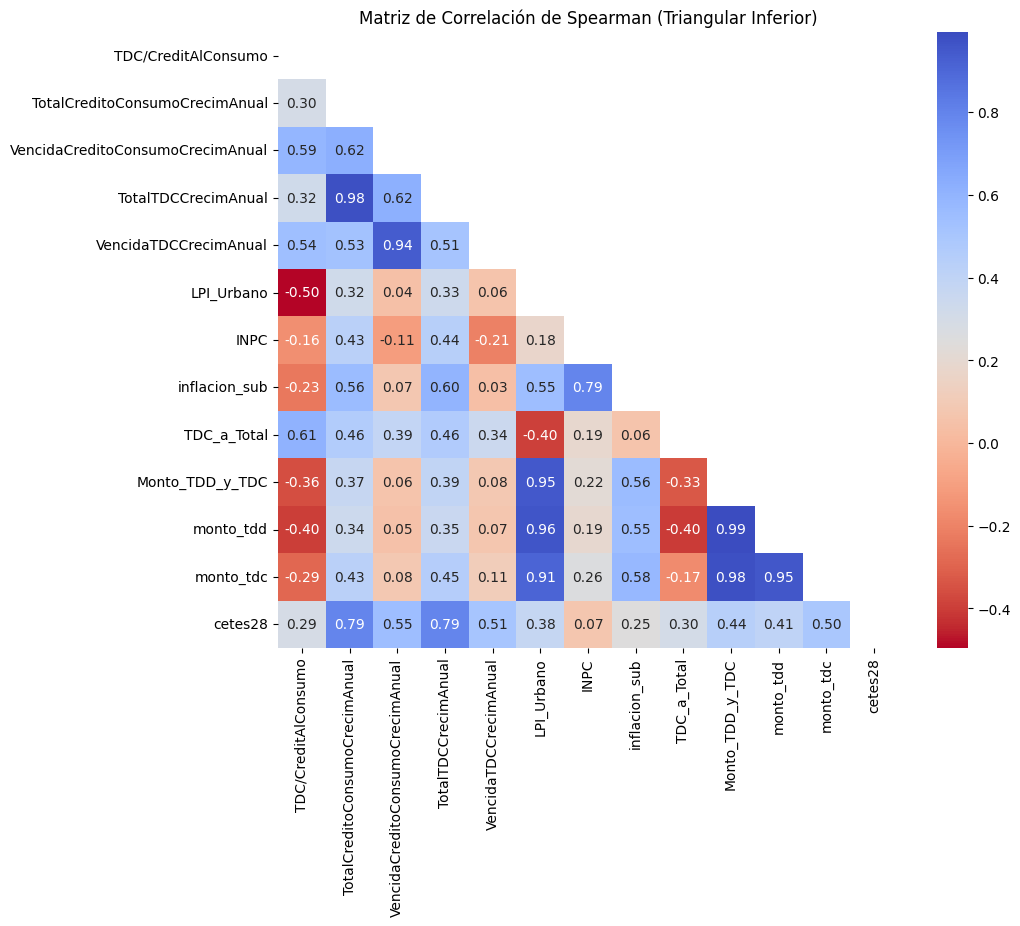

In [12]:
# matriz de correlación de Spearman
matriz_correlacion_spearman = Base_ALYA.iloc[:, 1:].corr(method='spearman')

# máscara para la parte superior de la matriz
import numpy as np
mask = np.triu(np.ones_like(matriz_correlacion_spearman, dtype=bool))

# heatmap con la máscara
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion_spearman, mask=mask, annot=True, cmap='coolwarm_r', fmt=".2f")
plt.title('Matriz de Correlación de Spearman (Triangular Inferior)')
plt.show()

Ahora veremos cuales series de la matriz cumplen con estacionariedad.

In [14]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Función para realizar el test ADF y devolver resultados
def verificar_estacionariedad(data):
    resultados = {}
    for columna in data.columns:
        adf_resultado = adfuller(data[columna].dropna())  # Ignorar NaN
        resultados[columna] = {
            'ADF Statistic': adf_resultado[0],
            'p-value': adf_resultado[1],
            'n_lags': adf_resultado[2],
            'critical_values': adf_resultado[4],
            'stationary': adf_resultado[1] < 0.05
        }
    return pd.DataFrame(resultados).T

# Aplicar la función a Base_ALYA
resultados_estacionariedad = verificar_estacionariedad(Base_ALYA.iloc[:, 1:])

# Mostrar los resultados
print(resultados_estacionariedad)

                                 ADF Statistic   p-value n_lags  \
TDC/CreditAlConsumo                   -2.27537  0.180035     12   
TotalCreditoConsumoCrecimAnual       -2.244529  0.190483      7   
VencidaCreditoConsumoCrecimAnual     -2.090461  0.248368      6   
TotalTDCCrecimAnual                   -1.13945  0.699086     12   
VencidaTDCCrecimAnual                -2.965462  0.038248      8   
LPI_Urbano                            0.315241  0.978033     12   
INPC                                 -1.555652  0.505824     12   
inflacion_sub                        -1.955504  0.306417      2   
TDC_a_Total                          -2.109158  0.240848     12   
Monto_TDD_y_TDC                       1.438775  0.997283     12   
monto_tdd                              2.24021  0.998914     12   
monto_tdc                             0.685375  0.989541     12   
cetes28                              -2.312669  0.167915      5   

                                                             

Graficar dispersión entre I.Subyacente y LPI para probar relacion

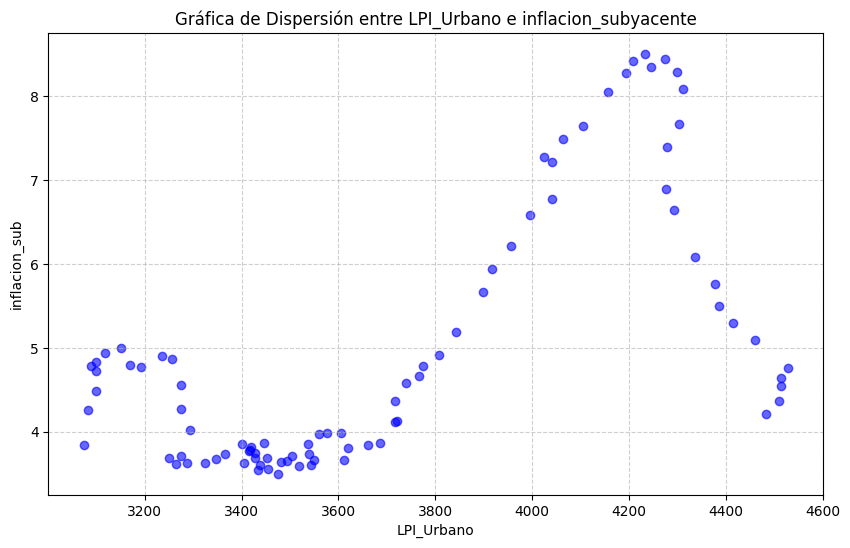


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9207  , p=0.1694  , df_denom=85, df_num=1
ssr based chi2 test:   chi2=1.9885  , p=0.1585  , df=1
likelihood ratio test: chi2=1.9663  , p=0.1608  , df=1
parameter F test:         F=1.9207  , p=0.1694  , df_denom=85, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9734  , p=0.3821  , df_denom=82, df_num=2
ssr based chi2 test:   chi2=2.0655  , p=0.3560  , df=2
likelihood ratio test: chi2=2.0413  , p=0.3604  , df=2
parameter F test:         F=0.9734  , p=0.3821  , df_denom=82, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9273  , p=0.4316  , df_denom=79, df_num=3
ssr based chi2 test:   chi2=3.0285  , p=0.3873  , df=3
likelihood ratio test: chi2=2.9764  , p=0.3953  , df=3
parameter F test:         F=0.9273  , p=0.4316  , df_denom=79, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8598  , p=0.4921  , df_d

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [15]:
#import matplotlib.pyplot as plt
#import seaborn as sns
LPI_Urbano = Base_ALYA.iloc[:, 6]  # Primera columna
inflacion_sub = Base_ALYA.iloc[:, 8]  # Quinta columna

plt.figure(figsize=(10, 6))
plt.scatter(LPI_Urbano, inflacion_sub, color='blue', alpha=0.6)
plt.title('Gráfica de Dispersión entre LPI_Urbano e inflacion_subyacente')
plt.xlabel('LPI_Urbano')
plt.ylabel('inflacion_sub')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Combinar las columnas en un solo DataFrame
data_lpi_is = pd.DataFrame({'LPI_Urbano': LPI_Urbano, 'inflacion_sub': inflacion_sub})

# Realizar el test de causalidad de Granger
max_lag = 5  # Define el número máximo de rezagos a probar
resultado = grangercausalitytests(data_lpi_is, max_lag, verbose=True)

# Opcional: extraer el p-valor del último rezago
p_values = [resultado[lag][0]['ssr_ftest'][1] for lag in range(1, max_lag + 1)]
print(f"P-values para los rezagos hasta {max_lag}: {p_values}")



Aqui vamos a manipular las series para comparar inflacion con tasa de crecimiento anual de las LPI, para esto vamos a exluir 2017 del analisis






In [16]:
# extraemos una columna para modifirla
LPI_urb = Base_ALYA.iloc[:,6]  # .iloc se usa para seleccionar la columna por índice (empezando desde 0)

# Calcular la tasa de crecimiento anual
tasa_LPI_anual = (LPI_urb[12:].values / LPI_urb[:-12].values) - 1
# Suponiendo que 'tasa_LPI_anual' es un array numpy
tasa_LPI_anual_2 = pd.Series(tasa_LPI_anual)

#aquí extraemos 2 columnas expluyendo el 2017.
Inf_sub = Base_ALYA.iloc[12:, 8]  # .iloc se usa para seleccionar la columna por índice (empezando desde 0)
periodo = Base_ALYA.iloc[12:, 0]  # .iloc se usa para seleccionar la columna por índice (empezando desde 0)

#print(tasa_LPI_anual.head())
#tasa_LPI_anual
#print(tasa_LPI_anual_2.head())
#print(Inf_sub.head())
#print(periodo.head())

Ahora vamos a repetir la gráfica de dispersión y las pruebas granger y pvalue

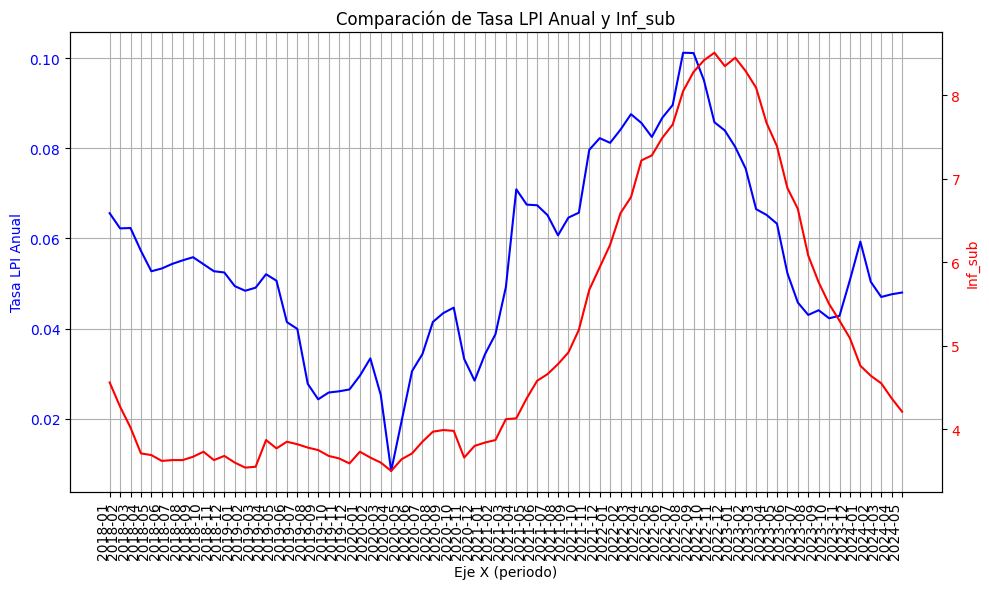

In [30]:
import matplotlib.pyplot as plt

# Asegurarse de que las series tengan la misma longitud que el periodo
tasa_LPI_anual_2 = tasa_LPI_anual_2[:len(periodo)]
Inf_sub = Inf_sub[:len(periodo)]

# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar tasa_LPI_anual_2 en el eje Y izquierdo
ax1.plot(periodo, tasa_LPI_anual_2, label='Tasa LPI Anual', color='blue')
ax1.set_xlabel('Eje X (periodo)')
ax1.set_ylabel('Tasa LPI Anual', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Crear un segundo eje Y para Inf_sub
ax2 = ax1.twinx()
ax2.plot(periodo, Inf_sub, label='Inf_sub', color='red')
ax2.set_ylabel('Inf_sub', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Mejorar la visualización del eje X para evitar que se sature
fig.autofmt_xdate(rotation=90)


# Título y ajuste de la gráfica
plt.title('Comparación de Tasa LPI Anual y Inf_sub')
fig.tight_layout()

# Mostrar el gráfico
plt.show()

La siguiente prueba demuestra que:

No hay evidencia significativa de que "Tasa LPI Anual" cause "Inf_sub".

Hay evidencia de causalidad de "Inf_sub" hacia "Tasa LPI Anual" cuando se usan 1 o 2 rezagos, lo que podría indicar que "Inf_sub" tiene un impacto sobre "Tasa LPI Anual" en períodos cortos.

In [31]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# Asegurarse de que ambas series tengan la misma longitud
tasa_LPI_anual_2 = tasa_LPI_anual_2[:len(Inf_sub)]
Inf_sub = Inf_sub[:len(tasa_LPI_anual_2)]

# Combinar las series en un solo DataFrame para la prueba
data = pd.DataFrame({'Tasa_LPI_Anual': tasa_LPI_anual_2, 'Inf_Sub': Inf_sub})

# Eliminar filas con NaN o valores infinitos
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Prueba de causalidad de Granger con hasta 5 rezagos
grangercausalitytests(data[['Tasa_LPI_Anual', 'Inf_Sub']], maxlag=5, verbose=True)

# También puedes probar la causalidad en la otra dirección
print("\nPrueba de causalidad de Granger en la dirección opuesta:\n")
grangercausalitytests(data[['Inf_Sub', 'Tasa_LPI_Anual']], maxlag=5, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0335  , p=0.3134  , df_denom=61, df_num=1
ssr based chi2 test:   chi2=1.0843  , p=0.2977  , df=1
likelihood ratio test: chi2=1.0752  , p=0.2998  , df=1
parameter F test:         F=1.0335  , p=0.3134  , df_denom=61, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1692  , p=0.8447  , df_denom=58, df_num=2
ssr based chi2 test:   chi2=0.3676  , p=0.8321  , df=2
likelihood ratio test: chi2=0.3666  , p=0.8325  , df=2
parameter F test:         F=0.1692  , p=0.8447  , df_denom=58, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4606  , p=0.7109  , df_denom=55, df_num=3
ssr based chi2 test:   chi2=1.5578  , p=0.6690  , df=3
likelihood ratio test: chi2=1.5385  , p=0.6734  , df=3
parameter F test:         F=0.4606  , p=0.7109  , df_denom=55, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5632  , p=0.6904  , df_d

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (12.62203995748583, 0.000742338794088011, 61.0, 1),
   'ssr_chi2test': (13.24279602096874, 0.0002736294486301006, 1),
   'lrtest': (12.036516651368856, 0.0005216836973164266, 1),
   'params_ftest': (12.622039957485768, 0.0007423387940880272, 61.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.467171417475208, 0.03781401341613596, 58.0, 2),
   'ssr_chi2test': (7.532131010377178, 0.023142940170701693, 2),
   'lrtest': (7.114819232589966, 0.028512587678257723, 2),
   'params_ftest': (3.4671714174751043, 0.037814013416139367, 58.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.083627393071454, 0.11291085467363883, 55.0, 3),
   'ssr_chi2test': (7.046449002023463, 0.07043192871547962, 3),
   'lrtest': (6.6739941549047614, 0.0830474647050804, 3),
   'params_ftest': (2.0836273930714806, 0.11291085467363508, 55.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 

Ahora que demostramos relación entre inflacion sub y Saldo TDC:

Existe evidencia de causalidad de TDC_Anual a inflacion_sub para rezagos de 1 y 2 períodos.

Hay una relación de causalidad de inflacion_sub a TDC_Anual que se mantiene estadísticamente significativa para rezagos de 1 a 5 períodos.


El comportamiento de la inflación puede tener un impacto prolongado sobre la tasa de crédito anual, mientras que la influencia de la tasa de crédito sobre la inflación es más limitada y menos persistente en el tiempo


In [ ]:
#inflacion_sub # 89 datos, del 17a24
#Inf_sub # 77 datos, del 18a24

import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Suponiendo que ya tienes 'Base_ALYA' cargado como un DataFrame
# Extraer las columnas 3 y 5 de 'Base_ALYA'
TDC_Anual = Base_ALYA.iloc[:, 4]
inflacion_sub = Base_ALYA.iloc[:, 8]

# Combinar ambas series en un nuevo DataFrame
data_tdc_a_Inf = pd.DataFrame({'TDC_Anual': TDC_Anual, 'inflacion_sub': inflacion_sub})

# Eliminar filas con valores NaN, si existen
#data_tdc_a_Inf = data.dropna()

# Prueba de causalidad de Granger de TDC_Anual a Inf_sub
print("Prueba de Causalidad de Granger (TDC_Anual → inflacion_sub)")
grangercausalitytests(data_tdc_a_Inf[['inflacion_sub', 'TDC_Anual']], maxlag=5, verbose=True)

# Prueba de causalidad de Granger de columna 5 a columna 3
print("Prueba de Causalidad de Granger (inflacion_sub → TDC_Anual)")
grangercausalitytests(data_tdc_a_Inf[['TDC_Anual', 'inflacion_sub']], maxlag=5, verbose=True)


Prueba de Causalidad de Granger (TDC_Anual → inflacion_sub)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=39.9834 , p=0.0000  , df_denom=85, df_num=1
ssr based chi2 test:   chi2=41.3946 , p=0.0000  , df=1
likelihood ratio test: chi2=33.9266 , p=0.0000  , df=1
parameter F test:         F=39.9834 , p=0.0000  , df_denom=85, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.4030  , p=0.0062  , df_denom=82, df_num=2
ssr based chi2 test:   chi2=11.4650 , p=0.0032  , df=2
likelihood ratio test: chi2=10.7700 , p=0.0046  , df=2
parameter F test:         F=5.4030  , p=0.0062  , df_denom=82, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4707  , p=0.2289  , df_denom=79, df_num=3
ssr based chi2 test:   chi2=4.8029  , p=0.1868  , df=3
likelihood ratio test: chi2=4.6736  , p=0.1973  , df=3
parameter F test:         F=1.4707  , p=0.2289  , df_denom=79, df_num=3

Granger Causality
number of lags (no ze

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (32.56461205064144, 1.6446580106504708e-07, 85.0, 1),
   'ssr_chi2test': (33.71395129948762, 6.384118405820227e-09, 1),
   'lrtest': (28.541639786228643, 9.170493121478508e-08, 1),
   'params_ftest': (32.56461205064111, 1.6446580106506802e-07, 85.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (8.391216530218976, 0.00048361467971976034, 82.0, 2),
   'ssr_chi2test': (17.805752149489045, 0.00013599722528608886, 2),
   'lrtest': (16.199446862439572, 0.0003036230991380008, 2),
   'params_ftest': (8.391216530219031, 0.0004836146797197365, 82.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (4.39478185812526, 0.006516770160899726, 79.0, 3),
   'ssr_chi2test': (14.35257872653566, 0.00246247730878757, 3),
   'lrtest': (13.273452934571537, 0.004081063175404732, 3),
   'params_ftest': (4.394781858124762, 0.006516770160903623, 79.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
   

Ahora que demostramos relación entre LPI y Operaciones realizadas con TDC:

Causalidad LPI a OpeTDC
con lags 1,2,3 se rechaza la hipótesis nula

Causalidad OpeTDC a LPI
con lag 5 se rechaza la hipótesis nula

Por lo tanto, existe relación causal de LPI_urb a Ope_TDC, es decir, cambios en LPI_urb podrían  influir en el comportamiento de Ope_TDC. Sin embargo, no se observa la misma relación en la dirección opuesta, lo que indica que las Ope_TDC no tienen un impacto significativo sobre LPI_urb.

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Suponiendo que ya tienes 'Base_ALYA' cargado como un DataFrame
# Extraer las columnas 3 y 5 de 'Base_ALYA'
LPI_urb = Base_ALYA.iloc[:, 6]
Ope_TDC = Base_ALYA.iloc[:, 12]

# Combinar ambas series en un nuevo DataFrame
data_lpi_a_opetdc = pd.DataFrame({'LPI_urb': LPI_urb, 'Ope_TDC': Ope_TDC})

# Prueba de causalidad de Granger de TDC_Anual a Inf_sub
print("Prueba de Causalidad de Granger (LPI_urb → Ope_TDC)")
grangercausalitytests(data_lpi_a_opetdc[['Ope_TDC', 'LPI_urb']], maxlag=5, verbose=True)

# Prueba de causalidad de Granger de columna 5 a columna 3
print("Prueba de Causalidad de Granger (Ope_TDC → LPI_urb)")
grangercausalitytests(data_lpi_a_opetdc[['LPI_urb', 'Ope_TDC']], maxlag=5, verbose=True)

Prueba de Causalidad de Granger (LPI_urb → Ope_TDC)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=15.6049 , p=0.0002  , df_denom=85, df_num=1
ssr based chi2 test:   chi2=16.1557 , p=0.0001  , df=1
likelihood ratio test: chi2=14.8324 , p=0.0001  , df=1
parameter F test:         F=15.6049 , p=0.0002  , df_denom=85, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.8554  , p=0.0008  , df_denom=82, df_num=2
ssr based chi2 test:   chi2=16.6689 , p=0.0002  , df=2
likelihood ratio test: chi2=15.2506 , p=0.0005  , df=2
parameter F test:         F=7.8554  , p=0.0008  , df_denom=82, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.8632  , p=0.0037  , df_denom=79, df_num=3
ssr based chi2 test:   chi2=15.8824 , p=0.0012  , df=3
likelihood ratio test: chi2=14.5746 , p=0.0022  , df=3
parameter F test:         F=4.8632  , p=0.0037  , df_denom=79, df_num=3

Granger Causality
number of lags (no zero) 4
ss

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (0.4849157147148343, 0.4881039773212704, 85.0, 1),
   'ssr_chi2test': (0.5020303869988872, 0.4786093437601152, 1),
   'lrtest': (0.5006037958667093, 0.47923493961552355, 1),
   'params_ftest': (0.4849157147149889, 0.48810397732120225, 85.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.3064260042288899, 0.7369121496991708, 82.0, 2),
   'ssr_chi2test': (0.6502210333637419, 0.7224475067286759, 2),
   'lrtest': (0.6478032599363814, 0.7233213920286305, 2),
   'params_ftest': (0.3064249995736123, 0.7369128845500925, 82.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.521447093712486, 0.6687693228373497, 79.0, 3),
   'ssr_chi2test': (1.702953799719258, 0.6362772981106739, 3),
   'lrtest': (1.6863123624245873, 0.6399811463078688, 3),
   'params_ftest': (0.5214470641041086, 0.6687693428614832, 79.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.

LPI anual a Vencida_TDC

Solo aplica Vencida TDC a  LPI anual en el rezago 4

La relación de causalidad es unidireccional en este caso, con Vencida_TDC causando a tasa_LPI_anual en un rezago específico, pero no en otros.

In [33]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Suponiendo que ya tienes 'Base_ALYA' cargado como un DataFrame
# Extraer las columnas 3 y 5 de 'Base_ALYA'
Vencida_TDC = Base_ALYA.iloc[12:, 5]  # .iloc se usa para seleccionar la columna por índice (empezando desde 0)
#tasa_LPI_anual_2

# Combinar ambas series en un nuevo DataFrame
data_lpi_anual_a_Vencida = pd.DataFrame({'tasa_LPI_anual': tasa_LPI_anual, 'Vencida_TDC': Vencida_TDC})

# Prueba de causalidad de Granger de tasa_LPI_anual_2 a Vencida_TDC
print("Prueba de Causalidad de Granger (tasa_LPI_anual → Vencida_TDC)")
grangercausalitytests(data_lpi_anual_a_Vencida[['Vencida_TDC', 'tasa_LPI_anual']], maxlag=5, verbose=True)

# Prueba de causalidad de Granger de tasa_LPI_anual_2 a Vencida_TDC
print("Prueba de Causalidad de Granger (Vencida_TDC → tasa_LPI_anual)")
grangercausalitytests(data_lpi_anual_a_Vencida[['tasa_LPI_anual', 'Vencida_TDC']], maxlag=5, verbose=True)

Prueba de Causalidad de Granger (tasa_LPI_anual → Vencida_TDC)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4084  , p=0.2392  , df_denom=73, df_num=1
ssr based chi2 test:   chi2=1.4662  , p=0.2259  , df=1
likelihood ratio test: chi2=1.4523  , p=0.2282  , df=1
parameter F test:         F=1.4084  , p=0.2392  , df_denom=73, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9247  , p=0.1536  , df_denom=70, df_num=2
ssr based chi2 test:   chi2=4.1244  , p=0.1272  , df=2
likelihood ratio test: chi2=4.0150  , p=0.1343  , df=2
parameter F test:         F=1.9247  , p=0.1536  , df_denom=70, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7237  , p=0.1705  , df_denom=67, df_num=3
ssr based chi2 test:   chi2=5.7112  , p=0.1265  , df=3
likelihood ratio test: chi2=5.5015  , p=0.1385  , df=3
parameter F test:         F=1.7237  , p=0.1705  , df_denom=67, df_num=3

Granger Causality
number of lags (no

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (2.2517833969754117, 0.1377734795095087, 73.0, 1),
   'ssr_chi2test': (2.34432244068673, 0.12574022299738563, 1),
   'lrtest': (2.308892298877936, 0.12863569082295773, 1),
   'params_ftest': (2.2517833969754277, 0.13777347950950802, 73.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.4087438648835846, 0.2512940496216294, 70.0, 2),
   'ssr_chi2test': (3.0187368533219665, 0.22104954287988238, 2),
   'lrtest': (2.959567528068874, 0.22768691716148332, 2),
   'params_ftest': (1.4087438648836388, 0.2512940496216156, 70.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.3362373830845715, 0.26999949139568913, 67.0, 3),
   'ssr_chi2test': (4.427532821563804, 0.21884599394598525, 3),
   'lrtest': (4.300136777304601, 0.23082556825769057, 3),
   'params_ftest': (1.3362373830849457, 0.26999949139556995, 67.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

Aquí vamos a preparar el modelo de regresión, primero reducimos el data frame a las series analizadas y seleccionadas.

In [34]:
import pandas as pd

# Crear un nuevo DataFrame con las columnas 1, 3, 5 y 7 (TotalTDCCrecimAnual  LPI_Urbano  inflacion_sub     monto_tdc)
new_df = Base_ALYA.iloc[:, [4, 6, 8, 12]]  # Las columnas se indexan desde 0

# Mostrar el nuevo DataFrame
print(new_df)

    TotalTDCCrecimAnual  LPI_Urbano  inflacion_sub     monto_tdc
0              0.087165     3073.55           3.84   65009929640
1              0.088651     3083.67           4.26   58945613945
2              0.083827     3100.08           4.48   68495532819
3              0.092535     3098.49           4.72   65011304647
4              0.093612     3088.13           4.78   70470654742
..                  ...         ...            ...           ...
84             0.190665     4528.69           4.76  179567840478
85             0.177932     4514.94           4.64  167724258318
86             0.181139     4513.72           4.55  184687899258
87             0.159168     4509.23           4.37  179952177625
88             0.171369     4484.08           4.21  205791920865

[89 rows x 4 columns]


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0396
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011     
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012     
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3494e-04 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2371e-04 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9378e-04 
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7746e-04 
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1679e-04
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2906e-04 
E

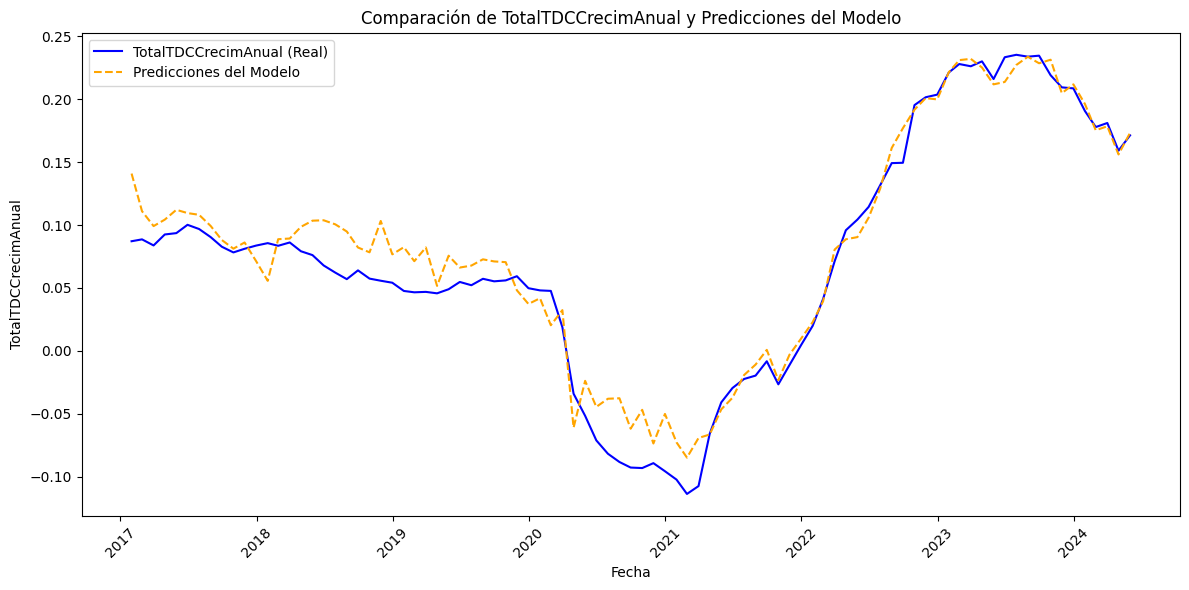

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Suponiendo que ya tienes tu new_df cargado

# Separar variables dependientes e independientes
X = new_df[['LPI_Urbano', 'inflacion_sub', 'monto_tdc']].values  # Variables independientes
y = new_df['TotalTDCCrecimAnual'].values  # Variable dependiente

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos (opcional pero recomendado para redes neuronales)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir el modelo de red neuronal
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Capa de entrada
model.add(layers.Dense(64, activation='relu'))  # Capa oculta
model.add(layers.Dense(1))  # Capa de salida (una única salida para regresión)

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo (parte medular)
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f'Loss on test set: {loss}')

# Realizar predicciones
#predictions = model.predict(X_test)

# Realizar predicciones en todos los datos (no solo en el conjunto de prueba)
X_scaled = scaler.transform(X)  # Escalar todo el conjunto de datos
predictions = model.predict(X_scaled)

# Crear el rango de fechas para los 89 datos
fechas = pd.date_range(start='2017-01-01', periods=89, freq='ME')  # Cambiar 'M' por 'ME'

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(fechas, y, label='TotalTDCCrecimAnual (Real)', color='blue')
plt.plot(fechas, predictions, label='Predicciones del Modelo', color='orange', linestyle='dashed')
plt.title('Comparación de TotalTDCCrecimAnual y Predicciones del Modelo')
plt.xlabel('Fecha')
plt.ylabel('TotalTDCCrecimAnual')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Aquí voy a tomar los datos del modelo.

In [40]:
predictions


array([[ 0.14095059],
       [ 0.11103097],
       [ 0.09920574],
       [ 0.10432634],
       [ 0.11213707],
       [ 0.10954475],
       [ 0.10816515],
       [ 0.09932127],
       [ 0.08813565],
       [ 0.08125172],
       [ 0.08617304],
       [ 0.07129791],
       [ 0.055693  ],
       [ 0.08878043],
       [ 0.08932278],
       [ 0.09860634],
       [ 0.10350359],
       [ 0.10382501],
       [ 0.10060977],
       [ 0.0949086 ],
       [ 0.08218598],
       [ 0.07835995],
       [ 0.10327471],
       [ 0.07674864],
       [ 0.08244144],
       [ 0.07129908],
       [ 0.08221462],
       [ 0.05167416],
       [ 0.07566901],
       [ 0.06624325],
       [ 0.06781707],
       [ 0.07277562],
       [ 0.07112504],
       [ 0.07053963],
       [ 0.04818343],
       [ 0.03730854],
       [ 0.04185499],
       [ 0.02039726],
       [ 0.03241054],
       [-0.0610006 ],
       [-0.02380558],
       [-0.04447071],
       [-0.03802288],
       [-0.03764851],
       [-0.06181877],
       [-0

Valore estadísticos del modelo

Por último vamos a realizar un pronóstico de cómo se espera el crecimiento del saldo de la cartera de Tarjeta de crédito de la Banca Múltiple.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


<ipython-input-45-7716ec8e4459>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-06-01', periods=12, freq='M')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

<ipython-input-45-7716ec8e4459>:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas_historicas = pd.date_range(start='2017-01-01', periods=len(predictions), freq='M')


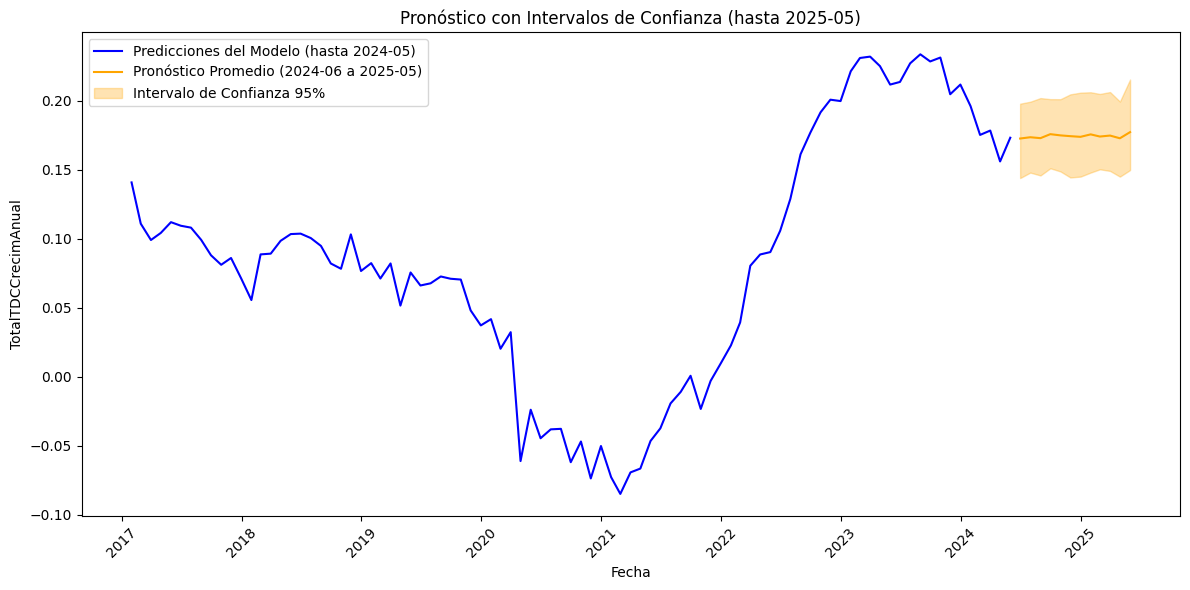

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generar fechas adicionales hasta mayo de 2025 (total 12 meses adicionales desde 2024-06 hasta 2025-05)
future_dates = pd.date_range(start='2024-06-01', periods=12, freq='M')

# Crear datos para predecir. Utiliza los datos más recientes como punto de partida.
last_known_values = new_df[['LPI_Urbano', 'inflacion_sub', 'monto_tdc']].iloc[-1].values

# Generar datos extendidos para predecir en el futuro
future_data = np.tile(last_known_values, (12, 1))
future_data = scaler.transform(future_data)  # Escalar los datos

# Generar múltiples predicciones para cada punto futuro
n_samples = 100  # Número de simulaciones para estimar límites de confianza
predictions_future = []

for _ in range(n_samples):
    future_predictions = model.predict(future_data + np.random.normal(0, 0.1, future_data.shape))
    predictions_future.append(future_predictions.flatten())

predictions_future = np.array(predictions_future)

# Calcular los límites superior e inferior del pronóstico
upper_limit = np.percentile(predictions_future, 97.5, axis=0)
lower_limit = np.percentile(predictions_future, 2.5, axis=0)
mean_prediction = np.mean(predictions_future, axis=0)

# Combinar fechas y predicciones para el gráfico
fechas_historicas = pd.date_range(start='2017-01-01', periods=len(predictions), freq='M')
fechas_futuras = future_dates
fechas_todo = np.concatenate([fechas_historicas, fechas_futuras])

# Combinar predicciones históricas y pronósticos
predicciones_todo = np.concatenate([predictions.flatten(), mean_prediction])

#  Graficar
plt.figure(figsize=(12, 6))
plt.plot(fechas_historicas, predictions.flatten(), label='Predicciones del Modelo (hasta 2024-05)', color='blue')
plt.plot(fechas_futuras, mean_prediction, label='Pronóstico Promedio (2024-06 a 2025-05)', color='orange')
plt.fill_between(fechas_futuras, lower_limit, upper_limit, color='orange', alpha=0.3, label='Intervalo de Confianza 95%')
plt.xlabel('Fecha')
plt.ylabel('TotalTDCCrecimAnual')
plt.title('Pronóstico con Intervalos de Confianza (hasta 2025-05)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Este es un pronóstico, jaló bien **

In [43]:
# Generar fechas adicionales hasta mayo de 2025 (total 12 meses adicionales desde 2024-06 hasta 2025-05)
future_dates = pd.date_range(start='2024-06-01', periods=12, freq='M')

# Crear datos para predecir. Utiliza los datos más recientes como punto de partida.
last_known_values = new_df[['LPI_Urbano', 'inflacion_sub', 'monto_tdc']].iloc[-1].values

# Generar datos extendidos para predecir en el futuro
future_data = np.tile(last_known_values, (12, 1))
future_data = scaler.transform(future_data)  # Escalar los datos

# Generar múltiples predicciones para cada punto futuro
n_samples = 100  # Número de simulaciones para estimar límites de confianza
predictions_future = []

for _ in range(n_samples):
    future_predictions = model.predict(future_data + np.random.normal(0, 0.1, future_data.shape))
    predictions_future.append(future_predictions.flatten())

predictions_future = np.array(predictions_future)

# Calcular los límites superior e inferior del pronóstico
upper_limit = np.percentile(predictions_future, 97.5, axis=0)
lower_limit = np.percentile(predictions_future, 2.5, axis=0)
mean_prediction = np.mean(predictions_future, axis=0)

# Crear un DataFrame para visualizar las tres series
df_forecast = pd.DataFrame({
    'Fecha': future_dates,
    'Pronóstico Central': mean_prediction,
    'Límite Inferior': lower_limit,
    'Límite Superior': upper_limit
})

print(df_forecast)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


<ipython-input-43-e3cd4139f03d>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-06-01', periods=12, freq='M')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

Intentando graficar bien el pronóstico + el modelo

<class 'numpy.ndarray'>


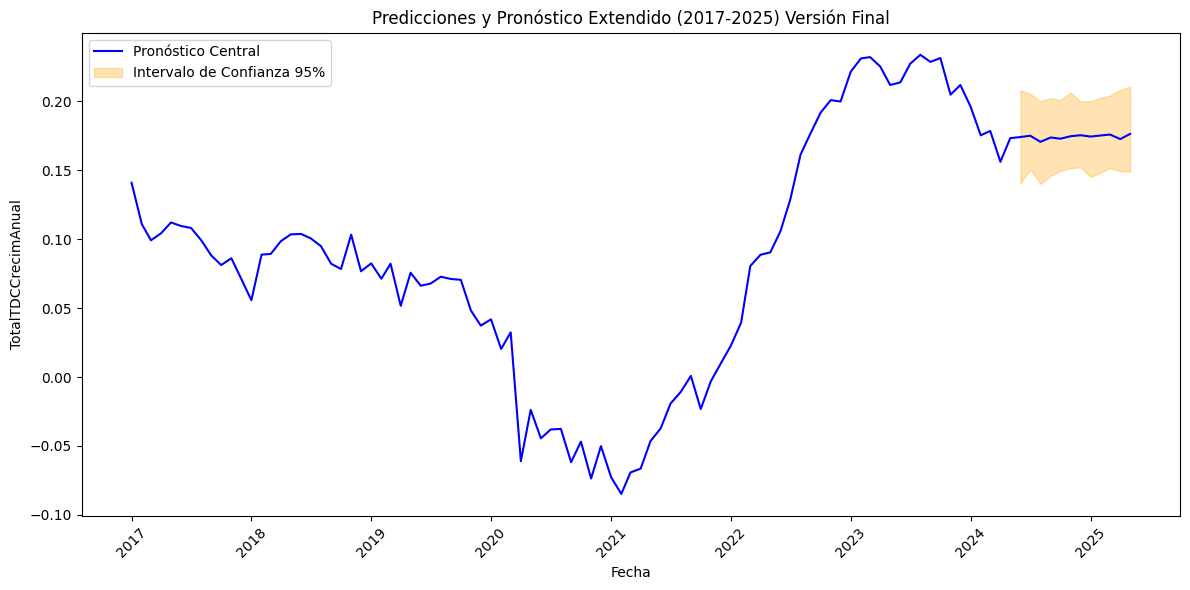

In [44]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que predictions es un numpy array o una lista, asegúrate de convertirlo a un DataFrame correctamente
# Verificar el tipo de 'predictions'
print(type(predictions))

# Convertir 'predictions' a DataFrame
if isinstance(predictions, np.ndarray):
    predictions_df = pd.DataFrame({'Predicciones': predictions.flatten()})
elif isinstance(predictions, list):
    predictions_df = pd.DataFrame({'Predicciones': predictions})
else:
    raise ValueError("El objeto 'predictions' no es ni un numpy array ni una lista.")

# Verificar que las columnas existan en df_forecast
required_columns = ['Pronóstico Central', 'Límite Inferior', 'Límite Superior']
for col in required_columns:
    if col not in df_forecast.columns:
        raise ValueError(f"La columna '{col}' no existe en df_forecast.")

# Crear la serie completa de valores centrales
serie_central = pd.concat([predictions_df['Predicciones'], df_forecast['Pronóstico Central']])

# Crear la serie completa de límites inferiores
serie_inferior = pd.concat([predictions_df['Predicciones'], df_forecast['Límite Inferior']])

# Crear la serie completa de límites superiores
serie_superior = pd.concat([predictions_df['Predicciones'], df_forecast['Límite Superior']])

# Generar fechas desde 2017-01 hasta 2025-05
fechas_completas = pd.date_range(start='2017-01-01', periods=len(serie_central), freq='MS')

# Asegurarse de que las longitudes coincidan
if len(fechas_completas) != len(serie_central):
    raise ValueError("Las longitudes de fechas y series no coinciden.")

# Graficar las series
plt.figure(figsize=(12, 6))

# Línea del pronóstico central
plt.plot(fechas_completas, serie_central, label='Pronóstico Central', color='blue')

# Intervalo de confianza
plt.fill_between(fechas_completas[-len(df_forecast):],
                 serie_inferior[-len(df_forecast):],
                 serie_superior[-len(df_forecast):],
                 color='orange', alpha=0.3, label='Intervalo de Confianza 95%')

# Etiquetas y configuración de la gráfica
plt.xlabel('Fecha')
plt.ylabel('TotalTDCCrecimAnual')
plt.title('Predicciones y Pronóstico Extendido (2017-2025) Versión Final')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()
